# Machine Learning - Random Forest

## Exercícios

**1) Baseado em seus conhecimentos sobre Random Forest explique suas vantagens e desvantagens.**

- Algumas vantagens
    - Maior robustez
    - Menos propenso a sofrer Overfitting em comparação com uma única Árvore de Decisão
    - Permite a descoberta de conhecimento.
    - Poucos parametros para ajustes
    
- Desvantagens
    - Exige um maior poder de processamento.
    - Pode ser lento o processo de classificação de novas amostras.

**2) Explique de forma teórica:<br>**
* 2.1 - O que é Bootstrap Dataset?
    * É um subconjunto do dataset formado a partir do conjunto original do dataset é selecione um número N de features aleatoriamente. Esse processo é repetido várias vezes. A partir do subconjunto selecionado é feita a verificação do atributo que melhor separa os dados. Agora é preciso separar mais 2 atributos a partir dos três resultantes para separar os dados e construir a árvore.
* 2.2 - Por que as árvores que compõem a floresta são diferentes?
    * As árvores são construídas considerando apenas os subconjuntos de atributos selecionados dos bootstrap dataset.


**3) Para que serve o parâmetro n_estimators do objeto RandomForestClassifier ?**
- n_estimators: É o número de estimadores (Decision Trees) que serão utilizados pelo Random Forest.

**4) É possível controlar o crescimento das árvores da floresta ?**
- Sim, é possível.

**5) Utilizando o dataset iris.csv faça:**
* 5.1 - Carregue a base de dados e separe os dados e as classes em variáveis distintas.
* 5.2 - Treine um modelo baseado em Random Forest com um total de 20 árvores.
* 5.3 - Utilizando o código abaixo, faça as alterações necessárias para listar **objetos DecisionTreeClassifiers** e suas propriedades como **profundidade máxima** e **features importantes** utilizando o modelo treinado no item anterior (5.2).

In [13]:
# 5.1 - Carregue a base de dados e separe os dados e as classes em variáveis distintas.
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()

In [47]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [48]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
df = pd.DataFrame(iris.data, columns=iris['feature_names'])
df['target'] = iris['target']

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
# 5.1 - Separe os dados e as classes em variáveis distintas.
iris_data = df.drop('target',1)
iris_target = df.target

In [20]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
iris_data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [36]:
# 5.2 - Treine um modelo baseado em Random Forest com um total de 20 árvores.
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(n_estimators=20,random_state=0)

In [37]:
random_clf

RandomForestClassifier(n_estimators=20, random_state=0)

In [43]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.3,random_state=0)

In [51]:
random_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [53]:
print('Número de árvores da floresta: {}'.format(len(random_clf.estimators_)))
print('Árvores floresta gerada:')

for tree in random_clf.estimators_:
    print("\nNumero de nós: {}".format(tree.tree_.node_count))
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth))
    print("Features importantes: {}".format(tree.feature_importances_))
    print("\nObjeto: {}".format(tree))

Número de árvores da floresta: 20
Árvores floresta gerada:

Numero de nós: 15
Profundidade da árvore: 5
Features importantes: [0.0245373  0.         0.44586313 0.52959957]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

Numero de nós: 13
Profundidade da árvore: 5
Features importantes: [0.         0.02455107 0.13142041 0.84402852]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=398764591)

Numero de nós: 17
Profundidade da árvore: 5
Features importantes: [0.50385763 0.02895753 0.38206827 0.08511657]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=924231285)

Numero de nós: 25
Profundidade da árvore: 8
Features importantes: [0.59660952 0.14904835 0.         0.25434213]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=1478610112)

Numero de nós: 7
Profundidade da árvore: 3
Features importantes: [0.         0.         0.02792333 0.97207667]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=44

**6) Baseado no conhecimento aprendido sobre os parâmetros min_samples_split, min_samples_leaf, max_depth e max_features para controlar o crescimento das árvores, faça: **

* Utilizando os códigos das células abaixo, utilize o DataFrame dfcancer para treinar um modelo RandomForestClassifiers com seus parametros padrão.
* Imprima os resultados de classificação utilizando Cross Validation.
* Utilize o GridSearchCV conforme aprendido nas aulas e descubra os melhores valores para os parametros min_samples_split, min_samples_leaf, max_depth e max_features.
* Treine novamente o modelo desta vez especificando os valores aos parametros e verifique novamente os resultados de classificação.

In [132]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [133]:
data = load_breast_cancer()
dfcancer = pd.DataFrame(data=data.data,columns=data.feature_names)
dfcancer['class'] = data.target

In [134]:
dfcancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


* Utilizando o modelo treinado após o Tunning dos parametros liste as features mais importantes.
* Utilizando o código utilizado em aula renderize de forma gráfica as features e suas importâncias.
* Utilize apenas as features relevantes e treine novamente o modelo para verificar os resultados.

In [135]:
dfcancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [136]:
dfcancer['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [137]:
dfcancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

In [138]:
Features = dfcancer
Cat_Columns = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Columns:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

In [162]:
Features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [139]:
dataset = dfcancer.drop('class', axis=1)
classes = dfcancer['class']

In [140]:
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [141]:
classes

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: class, Length: 569, dtype: int32

In [142]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dfcancer.drop('class', axis=1),
                                                    dfcancer['class'], 
                                                    test_size=0.3,
                                                    random_state=0
                                                   )

In [160]:
x_train.shape,x_test.shape

((398, 30), (171, 30))

In [177]:
x_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [161]:
y_train.shape,y_test.shape

((398,), (171,))

In [164]:
# Utilizando os códigos das células abaixo, utilize o DataFrame dfcancer para treinar um modelo 
# RandomForestClassifiers com seus parametros padrão.

modelo_randomforest_clf = RandomForestClassifier(random_state=0)

In [165]:
modelo_randomforest_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [166]:
from sklearn.model_selection import cross_val_predict

resultados_random = cross_val_predict(modelo_randomforest_clf, dataset,classes,cv=5)

In [167]:
# Imprima os resultados de classificação utilizando Cross Validation.

from sklearn.metrics import classification_report

print(classification_report(classes,resultados_random))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       212
           1       0.97      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



In [168]:
# Utilize o GridSearchCV conforme aprendido nas aulas e descubra os melhores valores para os parametros 
#min_samples_split, min_samples_leaf, max_depth e max_features.

from sklearn.model_selection import GridSearchCV

Lista de possíveis valores de estimators ou quantidade de árvores da floresta

In [169]:
valores_estimators = [10, 20, 50, 100, 150]

Lista de possíveis valores para o critério de divisão

In [170]:
valores_criterion = ['gini', 'entropy']

Lista de possíveis valores para a profundidade máxima de cada árvore

In [171]:
valores_max_depth = [10, 20, 50, 100]

Lista de possíveis valores para os parametros min_samples_split e min_samples_leaf

In [172]:
valores_min_samples_split = [2, 5, 10, 15]
valores_min_samples_leaf = [1, 5, 10, 15]

Define um dicionário que recebe as listas de parâmetros e valores.

In [173]:
parametros_grid = dict(n_estimators=valores_estimators,
                       criterion=valores_criterion,
                       max_depth=valores_max_depth,
                       min_samples_split=valores_min_samples_split,
                       min_samples_leaf=valores_min_samples_leaf
                       )

Dicionário com os parametros que serão utilizados no grid.

In [174]:
parametros_grid

{'n_estimators': [10, 20, 50, 100, 150],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 50, 100],
 'min_samples_split': [2, 5, 10, 15],
 'min_samples_leaf': [1, 5, 10, 15]}

Instancia o GridSearch com o modelo a ser utilizado, parametros, número de folds e scoring

In [175]:
grid = GridSearchCV(modelo_randomforest_clf, parametros_grid, cv=5, scoring='accuracy')

Aplica o GridSearch passando as features e classes

In [176]:
grid.fit(dfcancer.drop('class', axis=1),dfcancer['class'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [10, 20, 50, 100, 150]},
             scoring='accuracy')

Imprime os scores por combinações

In [ ]:
grid.cv_results_

In [178]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [179]:
grid.best_score_

0.9701288619779536

In [180]:
# Utilizando o modelo treinado após o Tunning dos parametros liste as features mais importantes.
modelo_randomforest_clf.feature_importances_

array([0.02163832, 0.0160603 , 0.06024742, 0.03822632, 0.00537896,
       0.00670286, 0.08697012, 0.13127439, 0.00437402, 0.00268874,
       0.02795751, 0.00600722, 0.01623726, 0.02693081, 0.00255   ,
       0.00322232, 0.00519352, 0.00334574, 0.00662461, 0.00432006,
       0.09124751, 0.01303042, 0.15081306, 0.05391841, 0.01113124,
       0.01651618, 0.03479047, 0.1345056 , 0.00772685, 0.01036977])

In [182]:
# Utilizando o código utilizado em aula renderize de forma gráfica as features e suas importâncias.
feature_imp = pd.Series(modelo_randomforest_clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

worst perimeter            0.150813
worst concave points       0.134506
mean concave points        0.131274
worst radius               0.091248
mean concavity             0.086970
mean perimeter             0.060247
worst area                 0.053918
mean area                  0.038226
worst concavity            0.034790
radius error               0.027958
area error                 0.026931
mean radius                0.021638
worst compactness          0.016516
perimeter error            0.016237
mean texture               0.016060
worst texture              0.013030
worst smoothness           0.011131
worst fractal dimension    0.010370
worst symmetry             0.007727
mean compactness           0.006703
symmetry error             0.006625
texture error              0.006007
mean smoothness            0.005379
concavity error            0.005194
mean symmetry              0.004374
fractal dimension error    0.004320
concave points error       0.003346
compactness error          0

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualiza_features_importances(features_lista):
    %matplotlib inline
    
    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)
    
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title('Visualizing Important Features')
    plt.show()

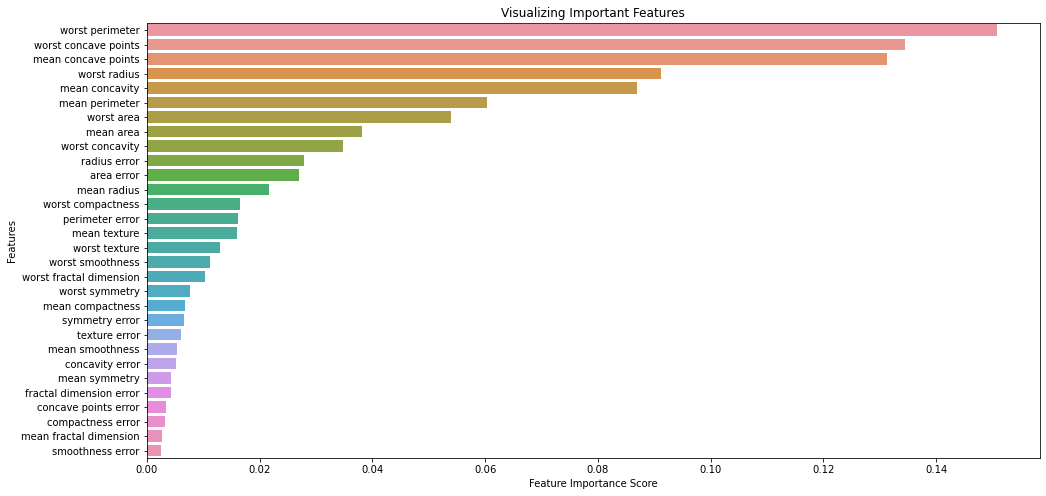

In [191]:
visualiza_features_importances(feature_imp)

In [192]:
# Utilize apenas as features relevantes e treine novamente o modelo para verificar os resultados.


# Selecionando apenas as features com importancia acima de um determinado score
features_selecionadas = []
for feature,importancia in feature_imp.iteritems():
    if importancia > 0.03:
        print('{}: \t{}'.format(feature, importancia))
        features_selecionadas.append(feature)

worst perimeter: 	0.1508130551596419
worst concave points: 	0.13450559746405344
mean concave points: 	0.13127439461956172
worst radius: 	0.09124750776588156
mean concavity: 	0.08697011928349571
mean perimeter: 	0.06024741686185955
worst area: 	0.0539184053255062
mean area: 	0.03822631781994852
worst concavity: 	0.03479047062293482


In [196]:
# Utilize apenas as features relevantes e treine novamente o modelo para verificar os resultados.

x_train, x_test, y_train, y_test = train_test_split(dfcancer[features_selecionadas],
                                                    dfcancer['class'],
                                                    test_size=0.3,
                                                    random_state=0
                                                    )

In [197]:
x_train.shape, x_test.shape

((398, 9), (171, 9))

In [198]:
y_train.shape, y_test.shape

((398,), (171,))

In [199]:
random_clf_selected_features = RandomForestClassifier(random_state=0)

In [200]:
random_clf_selected_features.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [202]:
resultado = random_clf_selected_features.predict(x_test)
resultado

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [203]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        63
           1       0.96      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [204]:
random_clf_selected_features

RandomForestClassifier(random_state=0)

In [205]:
feature_imp_selected = pd.Series(random_clf_selected_features.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp_selected

worst concave points    0.260679
worst perimeter         0.174158
mean concave points     0.173380
worst area              0.148657
worst radius            0.089137
mean concavity          0.070007
worst concavity         0.039086
mean area               0.025628
mean perimeter          0.019267
dtype: float64

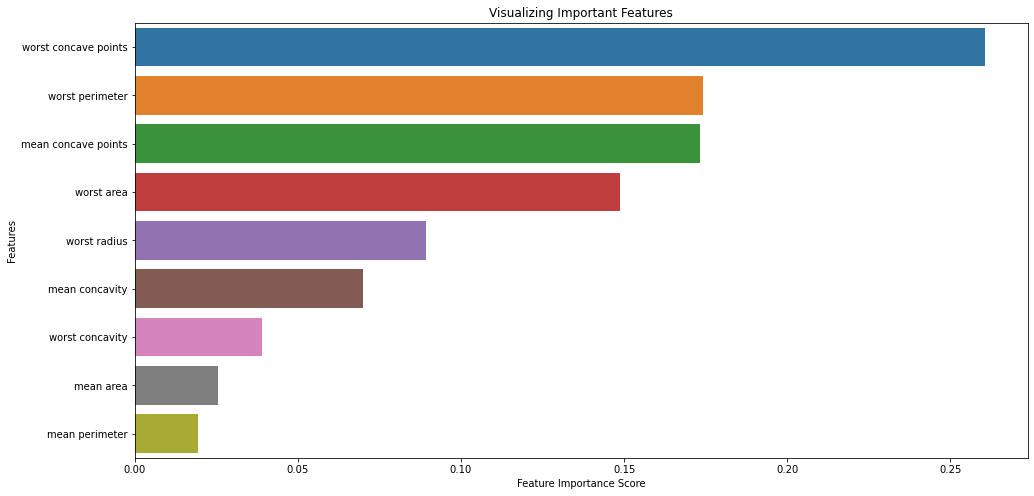

In [206]:
visualiza_features_importances(feature_imp_selected)